<a href="https://colab.research.google.com/github/undefined-ar/Movie_Recommendation_System_Python/blob/main/Copy_of_Copy_of_Recommendation_System_with_KNN_and_Cosine_similarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the Dataset

In [ ]:
movies = pd.read_csv('/content/drive/MyDrive/431_updated_dataset/movies.csv')
ratings = pd.read_csv('/content/drive/MyDrive/431_updated_dataset/ratings.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data exploration

In [ ]:
movies.head()

,platform_Name,movieId,title,genres,director,starring
0,Chorki,1,SHUKLOPOKKHO,ROMANTIC THRILLER,Vicky Zahed,"Khairul Basar, Sunerah Binte Kamal, Ziaul Rosh..."
1,Chorki,2,SHILPI,DRAMA,Agragami,"Uttam Kumar, Suchitra Sen"
2,Chorki,3,SHAREY CHUATTOR,DRAMA,Nirmal Dey,"Uttam Kumar, Suchitra Sen, Tulsi Chakraborty"
3,Chorki,4,SAGARIKA,DRAMA,Agragami,"Uttam Kumar, Suchitra Sen, Jamuna Sinha, Namit..."
4,Chorki,5,DEEP JWELEY JAI,DRAMA,Asit Sen,"Suchitra Sen, Tulsi Chakraborty, Ajit Chatterj..."


In [ ]:
ratings.tail()

,userId,movieId,rating,timestamp
105151,668,377,4.0,1415421771
105152,668,378,2.5,1405143544
105153,668,379,2.0,1425877130
105154,668,380,1.0,1409116097
105155,668,381,2.0,1429927663


In [ ]:
ratings.describe()

,userId,movieId,rating,timestamp
count,105156.000000,105156.00000,105156.000000,1.051560e+05
mean,364.397105,191.00000,3.521569,1.129902e+09
std,197.253184,109.98537,1.045663,1.799862e+08
min,1.000000,1.00000,0.500000,8.285650e+08
25%,192.000000,96.00000,3.000000,9.710931e+08
50%,383.000000,191.00000,3.500000,1.113691e+09
75%,555.000000,286.00000,4.000000,1.274980e+09
max,668.000000,381.00000,5.000000,1.452405e+09


In [ ]:
dataset = pd.merge(movies, ratings, how='left', on='movieId')

In [ ]:
dataset.tail()

,platform_Name,movieId,title,genres,director,starring,userId,rating,timestamp
105151,Hoichoi,381,"Mismatch,Episode: Toka Tok Toka Tok (2018)",Comedy,NaN,"Supurna Malakar, Rajdeep Gupta, Rachel White...",668,3.0,1195929142
105152,Hoichoi,381,"Mismatch,Episode: Toka Tok Toka Tok (2018)",Comedy,NaN,"Supurna Malakar, Rajdeep Gupta, Rachel White...",668,3.0,1277288816
105153,Hoichoi,381,"Mismatch,Episode: Toka Tok Toka Tok (2018)",Comedy,NaN,"Supurna Malakar, Rajdeep Gupta, Rachel White...",668,3.5,1282189549
105154,Hoichoi,381,"Mismatch,Episode: Toka Tok Toka Tok (2018)",Comedy,NaN,"Supurna Malakar, Rajdeep Gupta, Rachel White...",668,3.5,1340639247
105155,Hoichoi,381,"Mismatch,Episode: Toka Tok Toka Tok (2018)",Comedy,NaN,"Supurna Malakar, Rajdeep Gupta, Rachel White...",668,2.0,1429927663


In [ ]:
dataset.head()

,platform_Name,movieId,title,genres,director,starring,userId,rating,timestamp
0,Chorki,1,SHUKLOPOKKHO,ROMANTIC THRILLER,Vicky Zahed,"Khairul Basar, Sunerah Binte Kamal, Ziaul Rosh...",1,4.0,1217897793
1,Chorki,1,SHUKLOPOKKHO,ROMANTIC THRILLER,Vicky Zahed,"Khairul Basar, Sunerah Binte Kamal, Ziaul Rosh...",5,1.0,1303499420
2,Chorki,1,SHUKLOPOKKHO,ROMANTIC THRILLER,Vicky Zahed,"Khairul Basar, Sunerah Binte Kamal, Ziaul Rosh...",9,2.0,842686918
3,Chorki,1,SHUKLOPOKKHO,ROMANTIC THRILLER,Vicky Zahed,"Khairul Basar, Sunerah Binte Kamal, Ziaul Rosh...",16,5.0,842889864
4,Chorki,1,SHUKLOPOKKHO,ROMANTIC THRILLER,Vicky Zahed,"Khairul Basar, Sunerah Binte Kamal, Ziaul Rosh...",20,3.0,1289757545


## List of all Genres

In [ ]:
genres = []
for genre in movies.genres:
    x = genre.split('|')
    print(x)
    for i in x:
        if(i not in genres):
            genres.append(str(i))

['ROMANTIC THRILLER']
['DRAMA']
['DRAMA']
['DRAMA']
['DRAMA']
['DRAMA']
['DRAMA']
['LOVE STORY']
['DRAMA']
['DRAMA']
['DRAMA']
['ROMANTIC DRAMA']
['THRILLER']
['DRAMA']
['COMEDY']
['COMEDY']
['ROMANTIC']
['ROMANCE']
['ACTION']
['ROMANTIC']
['ROMANTIC']
['ROMANTIC']
['THRILLER']
['FEEL GOOD']
['FICTION']
['ROMANTIC']
['SHORT FILM']
['ACTION']
['ACTION']
['ACTION']
['DRAMA']
['ACTION']
['ROMANTIC']
['DRAMA']
['THRILLER']
['THRILLER']
['DRAMATIC']
['THRILLER']
['SUSPENSE- PSYCHOLOGICAL']
['SUSPENSE-MYSTERY']
['CRIME']
['COMEDY']
['MURDER MYSTERY']
['DRAMA']
['PSYCHOLOGICAL THRILLER']
['DETECTIVE DRAMA']
['SHORT FILM']
['SOCIAL']
['DRAMA']
['DRAMA']
['DRAMA']
['DRAMA']
['DRAMA']
['DRAMA']
['DRAMA']
['DRAMA']
['DRAMA']
['DRAMA']
['DRAMA']
['DRAMA']
['DRAMA']
['DRAMA']
['DRAMA']
['DRAMA']
['DRAMA']
['DRAMA']
['DRAMA']
['DRAMA']
['DRAMA']
[' DRAMA']
['DRAMA']
['DRAMA']
['SUSPENSE - SATIRE - DRAMA']
['SOCIAL']
['COMEDY']
['FAMILY DRAMA']
['DRAMA']
['BIOGRAPHY']
['DRAMA']
['COMEDY']
['COMEDY']


In [ ]:
genre

'Comedy'

## List of all Movie titles

In [ ]:
movies.title.describe()

count                              381
unique                             373
top       Kamini,Episode: Bijli (2019)
freq                                 2
Name: title, dtype: object

In [ ]:
titles = []
for title in movies.title:
    if(title not in titles):
        titles.append(str(title))

In [ ]:
titles

['SHUKLOPOKKHO',
 'SHILPI',
 'SHAREY CHUATTOR',
 'SAGARIKA',
 'DEEP JWELEY JAI',
 'BIPASHA',
 'AGNI PARIKSHA',
 'VALOBASHI TAI',
 'GUNIN',
 'SHUVAA',
 'DUBSHATAR',
 'TAAN',
 'REDRUM',
 'ANGAAR',
 'HERO 420',
 'ROMEO VS JULIET',
 'BHALOBASHA AAJ KAL',
 'AASHIQUI: TRUE LOVE',
 'AGNEE',
 'NICE TO MEET YOU',
 'FAGUN THEKE FAGUNE',
 'AR THEKO NA DURE',
 'BOKUL FUL',
 'NETWORKER BAIRE ',
 'WAITING ROOM',
 'OFF BEAT',
 'JODI JANTE',
 'NISHWAS ',
 'THEERAN',
 'GOHINE SHOBDO',
 'SCOOTY',
 'DESHA: THE LEADER',
 'EKJON TELAPOKA',
 'KHACHAR BHITOR OCHIN PAKHI ',
 'BAGHER BACHCHA',
 'GUERRILLA',
 'CHORABALI',
 'ARAAL',
 'DUI DINER DUNIYA',
 'SAHOSH',
 'HAPPY BIRTHDAY',
 'FLOOR NO. 7',
 'LOTTERY',
 'TITHIR OSHUKH',
 'MUNSHIGIRI',
 'ASO SHUSONGBAD ASO',
 'DAAG',
 'UPAHAR',
 'SANYASI RAJA',
 'POTHEY HOLO DERI',
 'ORA THAKEY ODHAREY',
 'INDRANI',
 'HAR MANA HAR',
 'DUI PRITHIBI',
 'DEYA NEYA',
 'DEBI CHOWDHURANI',
 'CHOWRINGHEE',
 'ANTONY FIRINGEE',
 'SONAR KELLA',
 'PATHER PANCHALI',
 'JALSAGHAR',
 'H

## Movies that received the highest number of ratings from User

number of ratings from different user for a single movie

In [ ]:
highest_number_of_rating = dataset.groupby('title')[['rating']].count()

# List of 10 movies with high number of ratings
highest_number_of_rating = highest_number_of_rating.nlargest(12, 'rating')

In [ ]:
highest_number_of_rating.head()

,rating
title,
BHALOBASHA AAJ KAL,552
Calm Sutra,552
Dhaka Metro,552
Japani Toy,552
"Kamini,Episode: Bijli (2019)",552


In [ ]:
highest_number_of_rating

,rating
title,
BHALOBASHA AAJ KAL,552
Calm Sutra,552
Dhaka Metro,552
Japani Toy,552
"Kamini,Episode: Bijli (2019)",552
Mismatch,552
Money Honey,552
REDRUM,552
"Bonyo Premer Golpo,Episode: Dead Man Crawling (2020)",276


In [ ]:
highest_number_of_rating.shape

(12, 1)

## Movies rated by users

In [ ]:
table = dataset.pivot_table(index='title', columns='userId', values='rating')

In [ ]:
table.shape

(373, 668)

In [ ]:
table.tail()

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
title,,,,,,,,,,,,,,,,,,,,,
Un Avenir Incertain,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,3.5,NaN,NaN,5.0,NaN,NaN,1.5,NaN,NaN,2.733333
Uttoron,NaN,NaN,5.0,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,4.0,NaN,NaN,4.0,NaN,NaN,3.5,NaN,4.5,3.000000
VALOBASHI TAI,4.0,NaN,NaN,NaN,3.5,NaN,NaN,NaN,2.0,NaN,...,2.5,NaN,NaN,NaN,NaN,2.0,NaN,3.0,NaN,3.071429
WAITING ROOM,3.5,NaN,NaN,NaN,3.5,NaN,NaN,NaN,2.0,NaN,...,3.0,NaN,NaN,NaN,NaN,5.0,NaN,4.0,NaN,2.714286
YOUTUMOR,NaN,NaN,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,4.0,NaN,NaN,NaN,3.5,NaN,4.5,2.892857


In [ ]:
table.head(10)

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
title,,,,,,,,,,,,,,,,,,,,,
"Bonyo Premer Golpo,Episode: Dead Man Crawling (2020)",NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,...,3.5,NaN,NaN,5.0,NaN,NaN,NaN,4.0,NaN,2.800000
"Case Jaundice,Episode: Classic Romance Vs. Digital Romance (2020)",NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0,NaN,...,2.5,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,2.500000
"Case Jaundice,Episode: Humans Vs. Corona (2020)",NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3.0,NaN,...,2.5,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN,2.966667
"Case Jaundice,Episode: Private Vs. Public Society (2020)",NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,...,4.0,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN,2.566667
"Case Jaundice,Episode: Work Vs. Home (2020)",NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0,NaN,...,3.0,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,2.900000
"Case Jaundice,Episode: Work from home Vs. Work from office (2020)",NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,4.0,NaN,...,2.5,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,3.033333
"Fish & Chips,Episode: Bhaam Beral (2021)",NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,3.0,NaN,...,4.0,NaN,NaN,NaN,3.0,NaN,NaN,4.0,NaN,2.933333
"Fish & Chips,Episode: Golokdhanda (2021)",NaN,NaN,NaN,NaN,4.5,NaN,NaN,NaN,2.0,NaN,...,4.5,NaN,NaN,NaN,3.0,NaN,NaN,5.0,NaN,2.900000
"Fish & Chips,Episode: Moilar Gari (2021)",NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,2.0,NaN,...,2.5,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,3.033333


## Classifying different ratings

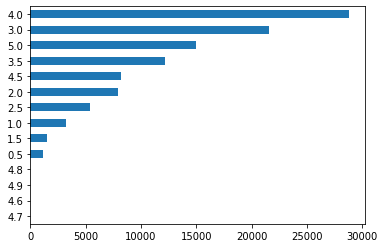

In [ ]:

dataset.rating.value_counts().sort_values().plot(kind='barh')

## Collaborative filtering with KNN (K- nearest neighbor)

In [ ]:
from scipy.sparse import csr_matrix
from  sklearn.neighbors import NearestNeighbors

In [ ]:
table

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
title,,,,,,,,,,,,,,,,,,,,,
"Bonyo Premer Golpo,Episode: Dead Man Crawling (2020)",NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,...,3.5,NaN,NaN,5.0,NaN,NaN,NaN,4.0,NaN,2.800000
"Case Jaundice,Episode: Classic Romance Vs. Digital Romance (2020)",NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0,NaN,...,2.5,NaN,NaN,4.0,NaN,NaN,NaN,4.0,NaN,2.500000
"Case Jaundice,Episode: Humans Vs. Corona (2020)",NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3.0,NaN,...,2.5,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN,2.966667
"Case Jaundice,Episode: Private Vs. Public Society (2020)",NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0,NaN,...,4.0,NaN,NaN,5.0,NaN,NaN,NaN,5.0,NaN,2.566667
"Case Jaundice,Episode: Work Vs. Home (2020)",NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3.0,NaN,...,3.0,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,2.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Un Avenir Incertain,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,3.5,NaN,NaN,5.0,NaN,NaN,1.5,NaN,NaN,2.733333
Uttoron,NaN,NaN,5.0,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,4.0,NaN,NaN,4.0,NaN,NaN,3.5,NaN,4.5,3.000000
VALOBASHI TAI,4.0,NaN,NaN,NaN,3.5,NaN,NaN,NaN,2.0,NaN,...,2.5,NaN,NaN,NaN,NaN,2.0,NaN,3.0,NaN,3.071429


In [ ]:
table = table.fillna(0)

In [ ]:
table

userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
title,,,,,,,,,,,,,,,,,,,,,
"Bonyo Premer Golpo,Episode: Dead Man Crawling (2020)",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,3.5,0.0,0.0,5.0,0.0,0.0,0.0,4.0,0.0,2.800000
"Case Jaundice,Episode: Classic Romance Vs. Digital Romance (2020)",0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,...,2.5,0.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,2.500000
"Case Jaundice,Episode: Humans Vs. Corona (2020)",0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,...,2.5,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,2.966667
"Case Jaundice,Episode: Private Vs. Public Society (2020)",0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,...,4.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,2.566667
"Case Jaundice,Episode: Work Vs. Home (2020)",0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,...,3.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,2.900000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Un Avenir Incertain,0.0,0.0,0.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,...,3.5,0.0,0.0,5.0,0.0,0.0,1.5,0.0,0.0,2.733333
Uttoron,0.0,0.0,5.0,0.0,0.0,0.0,2.5,0.0,0.0,0.0,...,4.0,0.0,0.0,4.0,0.0,0.0,3.5,0.0,4.5,3.000000
VALOBASHI TAI,4.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,2.0,0.0,...,2.5,0.0,0.0,0.0,0.0,2.0,0.0,3.0,0.0,3.071429


In [ ]:
table.values

array([[0.        , 0.        , 0.        , ..., 4.        , 0.        ,
        2.8       ],
       [0.        , 0.        , 0.        , ..., 4.        , 0.        ,
        2.5       ],
       [0.        , 0.        , 0.        , ..., 5.        , 0.        ,
        2.96666667],
       ...,
       [4.        , 0.        , 0.        , ..., 3.        , 0.        ,
        3.07142857],
       [3.5       , 0.        , 0.        , ..., 4.        , 0.        ,
        2.71428571],
       [0.        , 0.        , 5.        , ..., 0.        , 4.5       ,
        2.89285714]])

In [ ]:
matrix = csr_matrix(table.values)

In [ ]:
model_knn = NearestNeighbors(metric= 'cosine', algorithm= 'brute')
model_knn.fit(matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

#### table.shape[0]
#### table.shape[1]

> we are randomly choosing a book tiltle to get recommendations for that specific book.

In [ ]:
user_query_index = np.random.choice(table.shape[0])
user_query_index

126

#### We are randomly choosing a a movie to generate recommendation for using KNN

In [ ]:
table.index[user_query_index]

'EMON DESHTI KOTHAO KHUJE PABE NAKO TUMI '

In [ ]:
table.iloc[user_query_index, :]

userId
1      3.000000
2      0.000000
3      0.000000
4      0.000000
5      0.000000
         ...   
664    0.000000
665    3.500000
666    3.000000
667    0.000000
668    2.678571
Name: EMON DESHTI KOTHAO KHUJE PABE NAKO TUMI , Length: 668, dtype: float64

In [ ]:
distances, indices = model_knn.kneighbors(table.iloc[user_query_index, :].values.reshape(1, -1), n_neighbors = 6)

## Generating recommendation using KNN for the selected movie

In [ ]:
for i in range(0, len(distances.flatten())):
    # the below line will be printed anyway
    # we always start i = 0
    # just getting the variable i ready to print for which book we are
    # generating the recommendation for:
    if i == 0:
        print('Recommendation for {0}:\n'.format(table.index[user_query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, table.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendation for EMON DESHTI KOTHAO KHUJE PABE NAKO TUMI :

1: EI MUHURTE, with distance of 0.06812975055807091:
2: MAYA, with distance of 0.0697372274447079:
3: SHESH CHITHI, with distance of 0.07257989436612566:
4: ROSHNAI , with distance of 0.07319110726340294:
5: TONOYA, with distance of 0.07670542692873894:


# Recommendation with Cosine similarity

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

In [ ]:
cosine = linear_kernel(matrix, matrix)
cosine

array([[2669.03929847, 2077.93315618, 2106.33732851, ..., 1765.56602183,
        1570.73665675, 1081.07698413],
       [2077.93315618, 2830.2048767 , 2599.48418509, ..., 1571.8374504 ,
        1416.54935516, 1090.11396825],
       [2106.33732851, 2599.48418509, 2945.79805839, ..., 1577.02227183,
        1406.35322421, 1141.4693254 ],
       ...,
       [1765.56602183, 1571.8374504 , 1577.02227183, ..., 2899.40632972,
        2290.325884  , 1241.47166241],
       [1570.73665675, 1416.54935516, 1406.35322421, ..., 2290.325884  ,
        2910.58653097, 1327.81558248],
       [1081.07698413, 1090.11396825, 1141.4693254 , ..., 1241.47166241,
        1327.81558248, 2932.71612245]])

In [ ]:
def recommendations(title):
    idx = user_query_index
    print(idx)
    scores = list(enumerate(cosine[idx]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    scores = scores[1:5]
    print(scores)
    movie_indices = [i[0] for i in scores]
    print(movie_indices)
    return table.iloc[movie_indices]

In [ ]:
recommendations(table.index[user_query_index])

126
[(123, 2746.4410785147393), (261, 2727.469919217687), (200, 2692.481009070295), (323, 2685.9482001133783)]
[123, 261, 200, 323]


userId,1,2,3,4,5,6,7,8,9,10,...,659,660,661,662,663,664,665,666,667,668
title,,,,,,,,,,,,,,,,,,,,,
EI MUHURTE,3.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,4.5,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,2.821429
ROSHNAI,5.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,3.035714
MAYA,4.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,0.0,0.0,4.0,5.0,0.0,2.821429
TONOYA,4.5,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,0.0,2.857143
